In [5]:
from collections import defaultdict
import numpy as np

minmax_x = [9999999999999, -9999999999999]
minmax_y = [9999999999999, -9999999999999]

pos_dic = defaultdict(lambda: [])
with open("data/osmfish/osmFISH_inhibitory_neurons_dataset.csv") as f:
    print(f.readline())
    for line in f:
        entries = line.rstrip().split(',')
        x = float(entries[6]) - 4990
        y = float(entries[7])
        g = entries[2]
        pos_dic[g].append([x, y])
        if x < minmax_x[0]:
            minmax_x[0] = x
        if x > minmax_x[1]:
            minmax_x[1] = x
        if y < minmax_y[0]:
            minmax_y[0] = y
        if y > minmax_y[1]:
            minmax_y[1] = y
            
for g in pos_dic:
    pos_dic[g] = np.array(pos_dic[g])

,hybridization,gene,dot_id,r_px,c_px,x_um,y_um,intensity



In [6]:
all_genes = sorted(pos_dic.keys())
mrna_loci = [pos_dic[gene] for gene in all_genes]

In [7]:
minmax_x, minmax_y

([0.601872430939693, 3820.5847659401243], [0.0, 2023.8076358327514])

In [8]:
width, height = 3821, 2024

In [9]:
import ssam

In [11]:
ds = ssam.SSAMDataset(all_genes, mrna_loci, width, height)
analysis = ssam.SSAMAnalysis(ds, ncores=10, save_dir="data/osmfish_new_inhibitory", verbose=True)

In [12]:
analysis.run_fast_kde(bandwidth=2.5, use_mmap=False)

Processing gene Cacna2d3...
Processing gene Calb1...
Processing gene Clstn3...
Processing gene Dcn...
Processing gene Dlx1...
Processing gene Gabrb2...
Processing gene Ly6c2...
Processing gene Map3k7cl...
Processing gene Ngf...
Processing gene Oprm1...
Processing gene Pcdh7...
Processing gene Pdgfra...
Processing gene Slc42a2...
Processing gene Sncg...
Processing gene Tcerg1l...
Processing gene Unc13c...
Processing gene Zbtb20...


In [13]:
exp_thres = 0.1
norm_thres = 1.0

In [14]:
analysis.find_localmax(search_size=3, min_expression=exp_thres, min_norm=norm_thres)

Found 5069 local max vectors.


In [15]:
import matplotlib.pyplot as plt

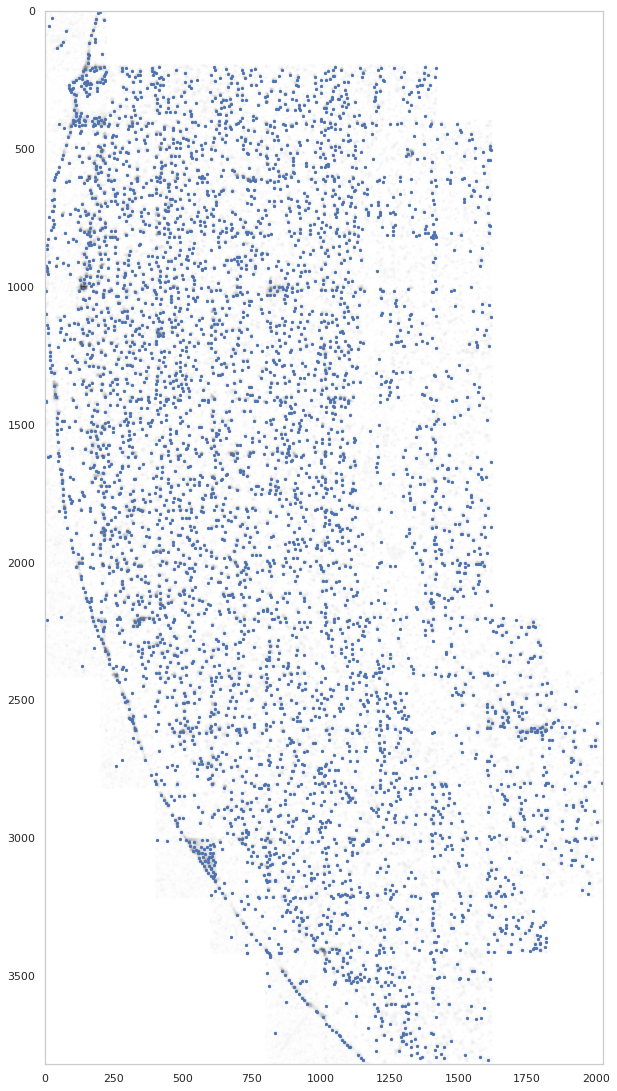

In [16]:
plt.figure(figsize=[10, 20])
ds.plot_l1norm(cmap="Greys")
ds.plot_localmax(s=5)

In [17]:
analysis.normalize_vectors_sctransform(vst_kwargs=dict(min_cells=1))

In [21]:
import pickle
with open("scrna_sigs.pkl", "rb") as f:
    scrna_clusters, scrna_genes, scrna_full_centroids, scrna_colors = pickle.load(f)

In [24]:
gene_conv_dic ={
    "Rhbg": "Slc42a2",
}
for f, t in gene_conv_dic.items():
    scrna_genes = np.where(scrna_genes == f, t, scrna_genes)

In [25]:
selected_genes_idx = [list(scrna_genes).index(g) for g in ds.genes]
scrna_uniq_clusters = np.unique(scrna_clusters)
scrna_centroids = scrna_full_centroids[:, selected_genes_idx]

In [27]:
analysis.map_celltypes(scrna_centroids)
analysis.filter_celltypemaps(min_norm=0.5, min_r=0.2)

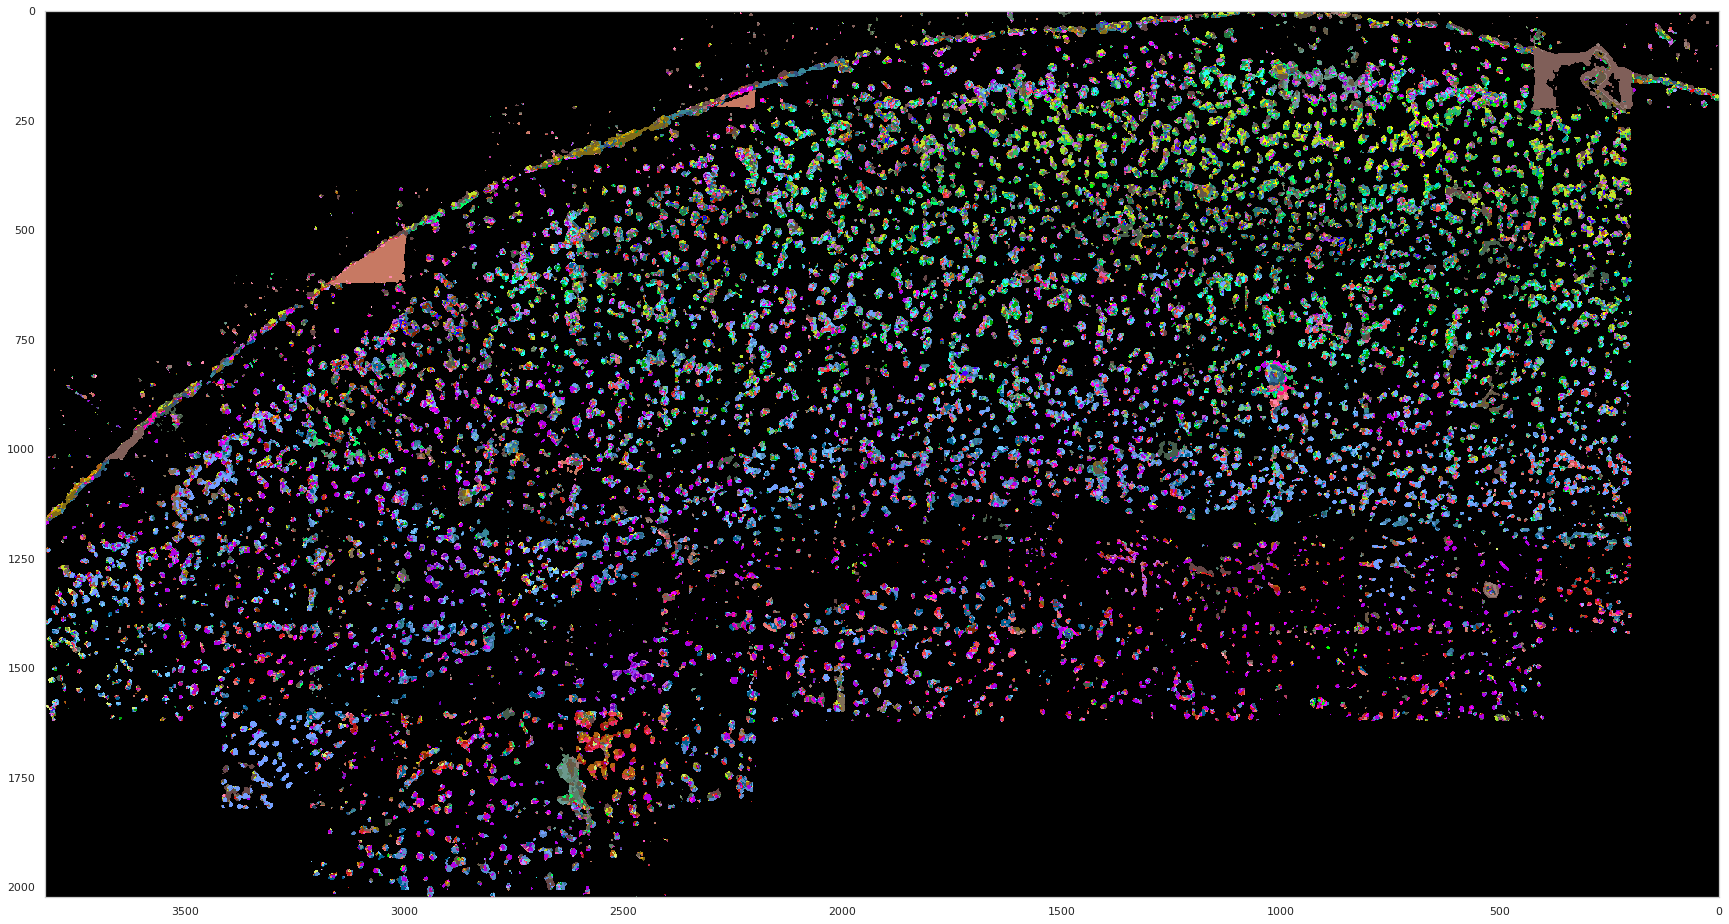

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=[30,30])
_ = ds.plot_celltypes_map(rotate=1, colors=scrna_colors)

/home/parkj/.conda/envs/ssam_3.7.4/lib/python3.7/site-packages/scipy-1.3.1-py3.7-linux-x86_64.egg/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


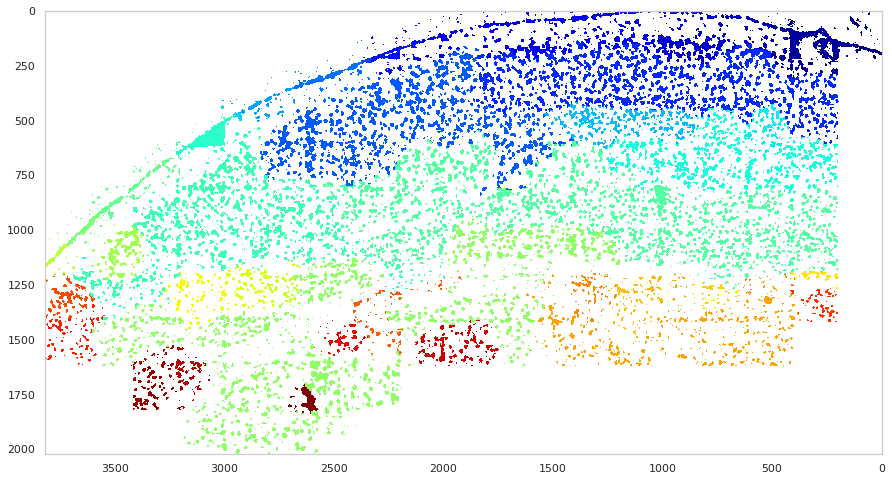

In [30]:
analysis.bin_celltypemaps(step=10, radius=100)
analysis.find_domains(n_clusters=20, merge_remote=False, merge_thres=0.8, norm_thres=1500)
plt.figure(figsize=[15, 15])
ds.plot_domains(rotate=1)

/home/parkj/.conda/envs/ssam_3.7.4/lib/python3.7/site-packages/scipy-1.3.1-py3.7-linux-x86_64.egg/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


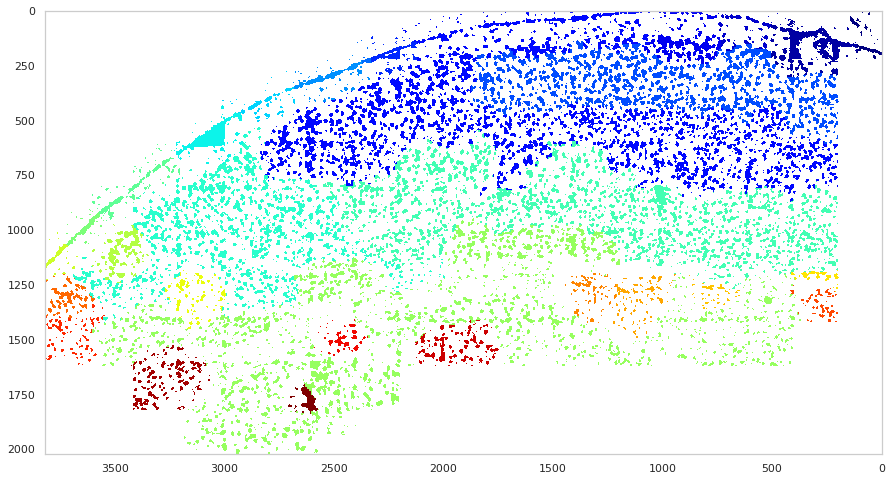

In [29]:
analysis.bin_celltypemaps(step=10, radius=100)
analysis.find_domains(n_clusters=20, merge_remote=False, merge_thres=0.7, norm_thres=1500)
plt.figure(figsize=[15, 15])
ds.plot_domains(rotate=1)

In [26]:
analysis.cluster_vectors(pca_dims=13, resolution=0.6, max_correlation=1.0, metric="correlation", centroid_correction_threshold=0.6)

KeyboardInterrupt: 

In [19]:
analysis.map_celltypes()
analysis.filter_celltypemaps(min_norm=0.5, min_r=0.6)

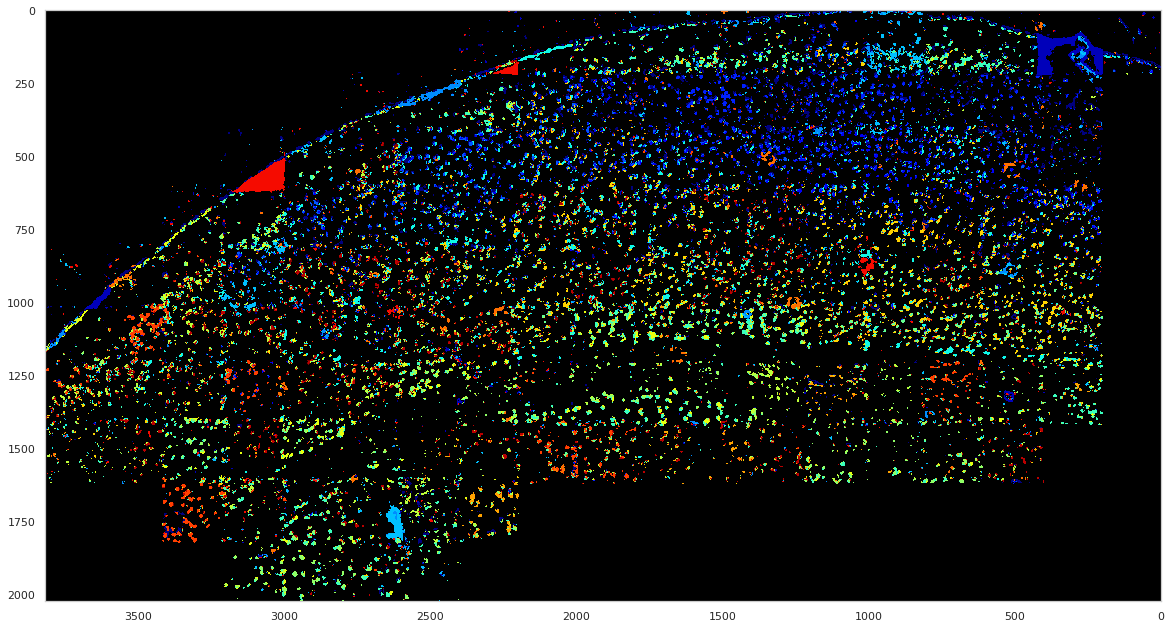

In [20]:
plt.figure(figsize=[20,15])
_=ds.plot_celltypes_map(rotate=True,)#colors=colors,background='white')#,set_alpha=True)